https://www.kaggle.com/kralmachine/data-analysis-visualization-for-beginners

### 변수 설명
* Loan_ID              :   대출받은 고객 ID
* paid off	           :   대출금 상환을 기간 내에 완료한 상태
* collection	       :   대출금 상환을 기간 내에 완료하지 못하고 있는 상태(연체)
* collection_paid off  :   대출금 상환을 만기 후에 완료한 상태
* Principal	           :   대출 원금
* terms	               :   1주일, 격주, 한달 단위의 상환 기간
* effective_date	   :   대출 상환 계약일
* due_date	           :   대출 만기일
* paid_off_time	       :   대출금을 지급한 실제 기간
* past_due_days	       :   만기되고 난 후 지난 대출 기간
* age	               :   나이
* education	           :   학력 수준(고졸 이하, 전문대졸, 학사, 석사이상)
* Gender	           :   성별

### isnull, unique, value_count 함수

In [191]:
def basic_(value_data):
    print("---결측값 개수---"), 
    print(value_data.isnull().sum()),
    print("---유일값---"),
    print(value_data.unique()),
    print("---유일값 빈도수---"),
    print(value_data.value_counts())

In [232]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('C:\sample/Loan payments data.csv')

# 상위 5개 데이터 추출

In [5]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# 하위 5개 데이터 추출

In [6]:
data.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [8]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


# age 의 통계

In [9]:
data.age.describe()

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

# age와 terms의 통계

In [10]:
data[['age','terms']].describe()

,age,terms
count,500.000000,500.000000
mean,31.116000,22.824000
std,6.084784,8.000064
min,18.000000,7.000000
25%,27.000000,15.000000
50%,30.000000,30.000000
75%,35.000000,30.000000
max,51.000000,30.000000


# row와 columns의 수

In [11]:
data.shape

(500, 11)

# 변수들의 상관계수

In [12]:
data.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


# age와 terms의 상관계수

In [13]:
data[['age', 'terms']].corr()

,age,terms
age,1.000000,-0.074259
terms,-0.074259,1.000000


# 데이터 타입확인

In [14]:
data.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

# 데이터 크기

In [29]:
data.size

5500

# 데이터 결측값 개수

In [36]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

# 데이터셋의 columns 추출

In [16]:
for col in data.columns:
    print(col)

Loan_Id
Loan_Status
Principal
Terms
Effective_Date
Due_Date
Paid_Of_Time
Past_Due_Days
Age
Education
Gender


# 데이터 columns 재설정

In [15]:
data=data.rename(columns={'Loan_ID':'Loan_Id', 'loan_status':'Loan_Status', 'Principal':'Principal',
                          'terms':'Terms', 'effective_date':'Effective_Date', 'due_date':'Due_Date',
                          'paid_off_time':'Paid_Of_Time','past_due_days':'Past_Due_Days',
                          'age':'Age','education':'Education','Gender':'Gender'})
for col in data.columns:
    print(col)

Loan_Id
Loan_Status
Principal
Terms
Effective_Date
Due_Date
Paid_Of_Time
Past_Due_Days
Age
Education
Gender


# Loan_Id 의 유일한 값을 ndarray로 변환 후 결측값을 제외한 각 값들의 빈도를 계산

In [17]:
data.Loan_Id.isnull().sum()

0

In [18]:
data.Loan_Id.unique()
data.Loan_Id.value_counts()

xqd20160428    1
xqd20160469    1
xqd20160097    1
xqd20160202    1
xqd20160023    1
              ..
xqd20160065    1
xqd20160281    1
xqd20420447    1
xqd20160102    1
xqd90160092    1
Name: Loan_Id, Length: 500, dtype: int64

# Loan_Status를 결측값을 포함한 빈도를 계산

In [19]:
data.Loan_Status.value_counts(dropna=False) # dropna가 False면 결측값 포함

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: Loan_Status, dtype: int64

# Loan_Stauts 의 결측값 개수

In [20]:
data.Loan_Status.isnull().sum()

0

# Loan_Status 의 유일값을 ndarray로 변환 후 reshape함수를 이용해 열이 1개인 배열로 변환

In [26]:
data.Loan_Status.unique()
Loan_Statues_unique = data.Loan_Status.unique().reshape(-1,1)
Loan_Statues_unique

array([['PAIDOFF'],
       ['COLLECTION'],
       ['COLLECTION_PAIDOFF']], dtype=object)

## 대출금 상환을 기간내에 완료한 인원의 수 = paidoff_count
## 대출금 상환을 기간 내에 완료하지 못하고 있는 상태(연체)의 인원수 = collection_count
## 대출금 상환을 만기 후에 완료한 상태의 인원수 = collection_paidoff_count

In [41]:
paidoff_count = 0
collection_count = 0
collection_paidoff_count = 0

paidoff_count = len(data[data.Loan_Status == Loan_Statues_unique[0][0]].Loan_Id)
collection_count = len(data[data.Loan_Status == Loan_Statues_unique[1][0]].Loan_Id)
collection_paidoff = len(data[data.Loan_Status == Loan_Statues_unique[2][0]].Loan_Id)

## 대출 원금 빈도수 계산

In [42]:
data.Principal.value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

## Principal의 결측값 개수

In [44]:
data.Principal.isnull().sum()

0

## Loan_Status 로 groupby해서 Principal컬럼별 빈도수 계산

In [56]:
data.groupby('Loan_Status')['Principal'].value_counts()

Loan_Status         Principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: Principal, dtype: int64

## 대출 상태별 대출원금 총합계

In [63]:
data.groupby('Loan_Status')['Principal'].sum()

Loan_Status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64

In [68]:
print(data.Terms.isnull().sum()) # Terms의 결측값 개수
print(data.Terms.value_counts()) # Terms 별 빈도수
print(data.Terms.unique()) # 유일값 ndarray로 반환

0
30    272
15    207
7      21
Name: Terms, dtype: int64
[30 15  7]


In [76]:
print(data.groupby('Terms')['Principal'].value_counts()) #Terms의 Principal 별 빈도수
print(data.groupby('Terms')['Principal'].sum()) # Terms 별 대출원금 합계

Terms  Principal
7      1000          11
       300            6
       800            2
       500            1
       900            1
15     800          103
       1000         100
       500            2
       700            1
       900            1
30     1000         266
       800            6
Name: Principal, dtype: int64
Terms
7      15800
15    185000
30    270800
Name: Principal, dtype: int64


In [81]:
print(data.Effective_Date.isnull().sum()) # Effective_Date의 결측값 개수
print(data.Effective_Date.value_counts()) # Effective_Date의 유일값 별 빈도수

0
9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: Effective_Date, dtype: int64


## Effective_Date 로 gruopby 해서  Terms와 Principal 의 개수

In [91]:
data.groupby('Effective_Date')[['Terms', 'Principal']].count()

,Terms,Principal
Effective_Date,,
9/10/2016,46,46
9/11/2016,231,231
9/12/2016,148,148
9/13/2016,23,23
9/14/2016,33,33
9/8/2016,4,4
9/9/2016,15,15


## Effective_Date 로 gruopby 해서  Terms와 Principal 의 합계

In [92]:
data.groupby('Effective_Date')[['Terms', 'Principal']].sum()

,Terms,Principal
Effective_Date,,
9/10/2016,1026,43200
9/11/2016,5328,219000
9/12/2016,3335,139400
9/13/2016,441,20900
9/14/2016,840,31400
9/8/2016,105,4000
9/9/2016,337,13700


## Effective_Date 로 gruopby 해서  Terms와 Principal 의 평균

In [93]:
data.groupby('Effective_Date')[['Terms', 'Principal']].mean()

,Terms,Principal
Effective_Date,,
9/10/2016,22.304348,939.130435
9/11/2016,23.064935,948.051948
9/12/2016,22.533784,941.891892
9/13/2016,19.173913,908.695652
9/14/2016,25.454545,951.515152
9/8/2016,26.250000,1000.000000
9/9/2016,22.466667,913.333333


## Age 의 결측값 개수, 유일값, 각 값들의 빈도수

In [98]:
print(data.Age.isnull().sum())
print(data.Age.unique())
print(data.Age.value_counts())

0
[45 50 33 27 28 35 29 36 26 39 40 32 43 25 34 31 37 24 21 30 22 44 46 38
 23 20 47 42 19 51 41 18 49]
26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
25    20
32    20
38    19
37    19
36    14
39    10
23    10
40     8
22     8
21     7
45     5
46     5
41     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
49     1
18     1
Name: Age, dtype: int64


In [104]:
print(data.groupby('Terms')['Age'].value_counts()) #Terms별 Age마다 빈도수
print(data.groupby('Age')[['Terms', 'Principal']].sum()) #Age 별 Terms와 Principal 각 총합

Terms  Age
7      29     4
       35     3
       25     2
       26     2
       27     2
             ..
30     44     2
       18     1
       46     1
       49     1
       50     1
Name: Age, Length: 72, dtype: int64
     Terms  Principal
Age                  
18      30       1000
19      60       2000
20     105       4000
21     195       6800
22     172       7300
23     202       8000
24     525      22200
25     404      19400
26    1079      44100
27     899      36600
28     780      30500
29     898      39000
30     900      36200
31     494      21200
32     457      19400
33     735      27700
34     554      24200
35     546      23000
36     330      13200
37     442      17400
38     450      18000
39     195       9000
40     195       7600
41     105       4600
42      90       3600
43     105       4400
44      90       3600
45     120       5000
46      90       4200
47      45       2800
49      30       1000
50      75       3800
51      15        800


In [113]:
data_age = data.Age.value_counts().index
len(data_age)

33

## ??

In [118]:
data_age_list=[]
for age in data_age:
    data_age_list.append(sum(data[data.Age == int(age)].Principal))

print(data_age_list)

[44100, 39000, 36600, 36200, 30500, 27700, 23000, 24200, 22200, 21200, 19400, 19400, 18000, 17400, 13200, 9000, 8000, 7600, 7300, 6800, 5000, 4200, 4600, 4400, 3600, 3800, 4000, 3600, 2800, 2000, 800, 1000, 1000]


## Education 분석

In [192]:
basic_(data.Education)

---결측값 개수---
0
---유일값---
['High School or Below' 'Bechalor' 'college' 'Master or Above']
---유일값 빈도수---
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: Education, dtype: int64


In [177]:
data.groupby('Education')['Age'].count()

Education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: Age, dtype: int64

In [178]:
data.groupby('Education')['Principal'].sum()

Education
Bechalor                 63300
High School or Below    198800
Master or Above           2400
college                 207100
Name: Principal, dtype: int64

## Gender 분석

In [193]:
basic_(data.Gender)

---결측값 개수---
0
---유일값---
['male' 'female']
---유일값 빈도수---
male      423
female     77
Name: Gender, dtype: int64


In [182]:
data.groupby('Education')['Gender'].value_counts()

Education             Gender
Bechalor              male       54
                      female     13
High School or Below  male      178
                      female     31
Master or Above       male        4
college               male      187
                      female     33
Name: Gender, dtype: int64

In [184]:
data.groupby(['Education','Gender'])['Principal'].sum()

Education             Gender
Bechalor              female     12400
                      male       50900
High School or Below  female     29400
                      male      169400
Master or Above       male        2400
college               female     31000
                      male      176100
Name: Principal, dtype: int64

In [186]:
data.groupby('Gender')['Principal'].sum()

Gender
female     72800
male      398800
Name: Principal, dtype: int64

## Effective 분석

In [194]:
basic_(data.Effective_Date)

---결측값 개수---
0
---유일값---
['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
---유일값 빈도수---
9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: Effective_Date, dtype: int64


In [189]:
data.groupby('Effective_Date')['Principal'].sum()

Effective_Date
9/10/2016     43200
9/11/2016    219000
9/12/2016    139400
9/13/2016     20900
9/14/2016     31400
9/8/2016       4000
9/9/2016      13700
Name: Principal, dtype: int64

## Due Date 분석

In [195]:
basic_(data.Due_Date)

---결측값 개수---
0
---유일값---
['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']
---유일값 빈도수---
10/10/2016    123
9/25/2016      87
10/11/2016     69
9/26/2016      60
10/9/2016      28
10/13/2016     21
9/24/2016      17
9/27/2016      12
11/10/2016     10
9/28/2016      10
11/9/2016       9
10/12/2016      8
10/8/2016       7
9/17/2016       7
9/23/2016       6
9/18/2016       4
10/25/2016      4
10/26/2016      4
10/7/2016       3
9/19/2016       3
9/16/2016       3
11/12/2016      2
11/7/2016       1
9/15/2016       1
9/22/2016       1
Name: Due_Date, dtype: int64


In [196]:
data.groupby('Due_Date')['Principal'].sum()

Due_Date
10/10/2016    122300
10/11/2016     68800
10/12/2016      7800
10/13/2016     20600
10/25/2016      4000
10/26/2016      3800
10/7/2016       3000
10/8/2016       7000
10/9/2016      27400
11/10/2016     10000
11/12/2016      2000
11/7/2016       1000
11/9/2016       9000
9/15/2016        300
9/16/2016       2200
9/17/2016       5900
9/18/2016       1900
9/19/2016       2500
9/22/2016       1000
9/23/2016       5400
9/24/2016      15600
9/25/2016      76800
9/26/2016      53900
9/27/2016      10600
9/28/2016       8800
Name: Principal, dtype: int64

## paidoff date 분석

In [198]:
basic_(data.Paid_Of_Time)

---결측값 개수---
100
---유일값---
['9/14/2016 19:31' '10/7/2016 9:00' '9/25/2016 16:58' '9/22/2016 20:00'
 '9/23/2016 21:36' '9/9/2016 13:45' '10/7/2016 23:07' '10/5/2016 20:33'
 '10/8/2016 16:00' '9/24/2016 13:00' '9/11/2016 19:11' '10/9/2016 16:00'
 '10/7/2016 23:32' '9/13/2016 21:57' '9/15/2016 14:27' '9/24/2016 16:00'
 '9/27/2016 14:21' '9/23/2016 18:49' '10/5/2016 22:05' '9/23/2016 7:42'
 '10/9/2016 9:00' '10/8/2016 17:09' '10/9/2016 23:00' '10/3/2016 12:50'
 '9/29/2016 12:18' '9/21/2016 20:16' '9/23/2016 8:21' '9/22/2016 19:17'
 '10/9/2016 17:33' '9/24/2016 14:41' '10/7/2016 21:48' '10/9/2016 17:44'
 '10/9/2016 7:24' '9/25/2016 21:49' '9/25/2016 9:00' '10/10/2016 16:00'
 '9/25/2016 13:00' '10/10/2016 11:33' '9/25/2016 14:36' '9/24/2016 9:00'
 '9/20/2016 15:00' '9/21/2016 22:29' '9/12/2016 22:17' '10/8/2016 14:14'
 '10/9/2016 8:53' '10/10/2016 9:00' '9/25/2016 19:21' '9/13/2016 4:34'
 '9/25/2016 16:00' '10/7/2016 2:33' '9/24/2016 11:40' '9/22/2016 6:38'
 '9/30/2016 21:12' '9/24/2016 13:4

In [200]:
data.groupby('Paid_Of_Time')['Principal'].sum()

Paid_Of_Time
10/1/2016 10:18     1000
10/1/2016 16:48     1000
10/10/2016 10:25     800
10/10/2016 11:33    1000
10/10/2016 11:45    1000
                    ... 
9/30/2016 14:29     1000
9/30/2016 14:38     1000
9/30/2016 21:12     1000
9/30/2016 7:12      1000
9/9/2016 13:45       300
Name: Principal, Length: 320, dtype: int64

## past_due_days date (만기되고 난 후 지난 대출 기간) 분석

In [201]:
basic_(data.Past_Due_Days)

---결측값 개수---
300
---유일값---
[nan 76. 61. 75. 60. 59. 74. 29. 44. 58. 73. 28.  2.  4. 13.  5.  3. 12.
 27.  1. 25. 24. 36.  7. 14. 23.  6. 38. 19. 52. 51.  9. 56.  8.]
---유일값 빈도수---
59.0    40
74.0    25
2.0     22
1.0     18
3.0     14
60.0    13
4.0      8
75.0     7
29.0     7
5.0      5
27.0     3
76.0     3
7.0      3
44.0     3
14.0     3
28.0     2
58.0     2
13.0     2
61.0     2
12.0     2
25.0     2
24.0     2
6.0      2
56.0     1
73.0     1
36.0     1
23.0     1
38.0     1
19.0     1
52.0     1
51.0     1
9.0      1
8.0      1
Name: Past_Due_Days, dtype: int64


In [202]:
data.groupby('Past_Due_Days')['Principal'].sum()

Past_Due_Days
1.0     17100
2.0     20600
3.0     13200
4.0      7600
5.0      4800
6.0      2000
7.0      3000
8.0      1000
9.0      1000
12.0     1800
13.0     2000
14.0     3000
19.0     1000
23.0     1000
24.0     2000
25.0     2000
27.0     3000
28.0     2000
29.0     7000
36.0     1000
38.0     1000
44.0     3000
51.0      800
52.0     1000
56.0      800
58.0     2000
59.0    39800
60.0    12800
61.0     2000
73.0      800
74.0    22000
75.0     6400
76.0     2600
Name: Principal, dtype: int64

In [204]:
data.groupby('Past_Due_Days')['Gender'].count()

Past_Due_Days
1.0     18
2.0     22
3.0     14
4.0      8
5.0      5
6.0      2
7.0      3
8.0      1
9.0      1
12.0     2
13.0     2
14.0     3
19.0     1
23.0     1
24.0     2
25.0     2
27.0     3
28.0     2
29.0     7
36.0     1
38.0     1
44.0     3
51.0     1
52.0     1
56.0     1
58.0     2
59.0    40
60.0    13
61.0     2
73.0     1
74.0    25
75.0     7
76.0     3
Name: Gender, dtype: int64

In [207]:
data.groupby('Education')['Past_Due_Days'].count()

Education
Bechalor                26
High School or Below    86
Master or Above          1
college                 87
Name: Past_Due_Days, dtype: int64

## data cleaning - 불필요한 데이터 제거

In [ ]:
data = data.drop('Loan_Id', axis=1) #Loan_Id 는 중요하지 않음

In [213]:
data.isnull().sum()

Loan_Status         0
Principal           0
Terms               0
Effective_Date      0
Due_Date            0
Paid_Of_Time      100
Past_Due_Days     300
Age                 0
Education           0
Gender              0
dtype: int64

In [214]:
data = data.drop(['Paid_Of_Time','Past_Due_Days'], axis = 1) # 결측값이 있는 Paid_Of_Time와 Past_Due_Days 제거

### 데이터 시각화

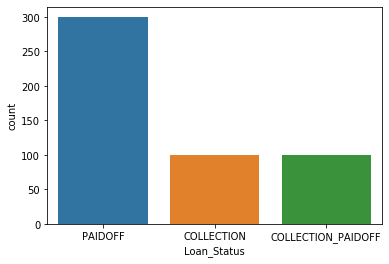

In [220]:
sns.countplot(data['Loan_Status'])
plt.show()

In [229]:
data[data['Loan_Status'] == 'PAIDOFF'].groupby('Education')['Gender'].count()

Education
Bechalor                 41
High School or Below    123
Master or Above           3
college                 133
Name: Gender, dtype: int64

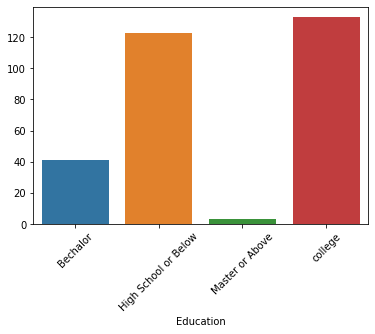

In [237]:
sns.barplot(x = data[data['Loan_Status'] == 'PAIDOFF'].groupby('Education')['Gender'].count().index,
            y = data[data['Loan_Status'] == 'PAIDOFF'].groupby('Education')['Gender'].count().values)
plt.xticks(rotation=45) # x축 label 기울기 변경
plt.show()

In [240]:
data[data['Principal'] == 1000].Gender.value_counts()

male      320
female     57
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender & Principal Bar Plot')

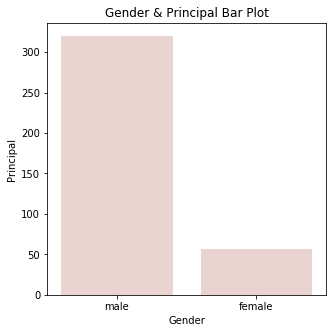

In [257]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x = data[data['Principal'] == 1000].Gender.value_counts().index,
                y = data[data['Principal'] == 1000].Gender.value_counts().values,
                palette=sns.cubehelix_palette(120))
plt.xlabel('Gender')
plt.ylabel('Principal')
plt.title('Gender & Principal Bar Plot')

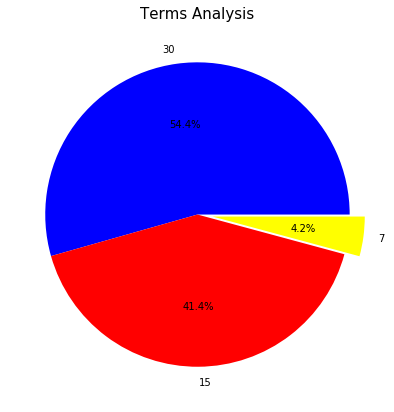

In [268]:
labels = data['Terms'].value_counts().index
colors = ['blue','red','yellow']
explode = [0,0,0.1]
values = data['Terms'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values, explode = explode, labels = labels, colors=colors, autopct = '%1.1f%%')
plt.title('Terms Analysis', color='black', fontsize=15)
plt.show()

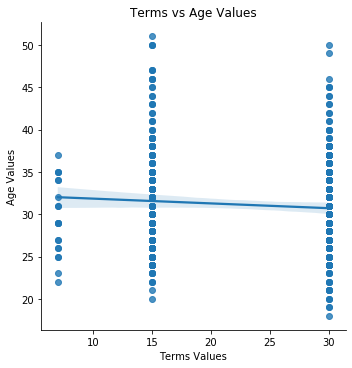

In [271]:
sns.lmplot(x='Terms',y='Age', data=data)
plt.xlabel('Terms Values')
plt.ylabel('Age Values')
plt.title('Terms vs Age Values')
plt.show()

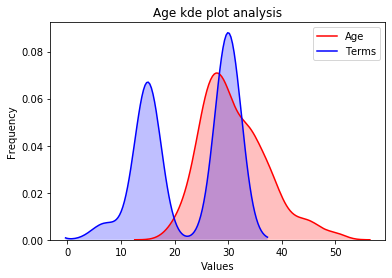

In [276]:
sns.kdeplot(data['Age'], shade=True, color='r')
sns.kdeplot(data['Terms'], shade=True, color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age kde plot analysis')
plt.show()

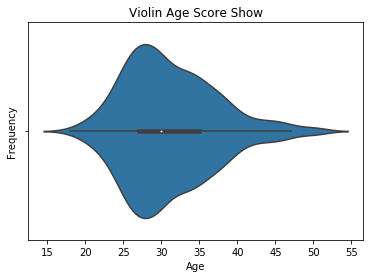

In [280]:
sns.violinplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Violin Age Score Show')
plt.show()

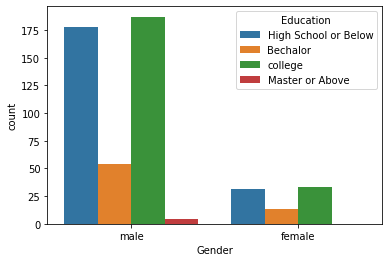

In [282]:
sns.countplot(data['Gender'],hue=data['Education'])
plt.show()

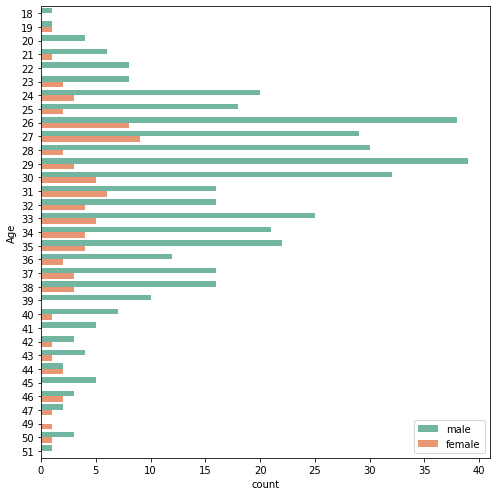

In [292]:
plt.figure(figsize=(7, 7))
sns.countplot(y = data['Age'], palette="Set2", hue=data['Gender'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()